In [1]:
# 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell # 这个对象设置所有行全部输出
  
# 导入威斯康辛州女性乳腺癌患病检测数据集
from sklearn.datasets import load_breast_cancer

# 导入数据集划分工具
from sklearn.model_selection import train_test_split

# 导入KNN分类器对象
from sklearn.neighbors import KNeighborsClassifier

# 设置该对象ast_node_interactivity的属性值为all，表示notebook下每一行有输出的代码全部输出运算结果
InteractiveShell.ast_node_interactivity = "all"

# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.style.use('ggplot')



In [2]:
# 1.加载数据
cancer_data = load_breast_cancer()

x = cancer_data.data
y = cancer_data.target

In [3]:
# 2.进行简单的数据探索

# x.shape

name = [
  '平均半径', '平均纹理', '平均周长', '平均面积', '平均光滑度', '平均紧凑度',
  '平均凹度', '平均凹点', '平均对称', '平均分形维数', '半径误差', '纹理误差', '周长误差', '面积误差', '平滑度误差', '紧凑度误差', '凹度误差', '凹点误差', '对称误差', '分形维数误差', '最差半径', '最差纹理', '最差边界', '最差区域', '最差平滑度', '最差紧凑型', '最差凹陷', '最差凹点', '最差对称性', '最差分形维数', '患病否'
]

data = pd.DataFrame(data = x)
targets = pd.DataFrame(data = y, columns = ['target'])
targets.value_counts()
data = pd.concat([data, targets], axis = 1)
data.columns = name
data

target
1         357
0         212
Name: count, dtype: int64

,平均半径,平均纹理,平均周长,平均面积,平均光滑度,平均紧凑度,平均凹度,平均凹点,平均对称,平均分形维数,...,最差纹理,最差边界,最差区域,最差平滑度,最差紧凑型,最差凹陷,最差凹点,最差对称性,最差分形维数,患病否
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [23]:
# 3.完成数据集的划分
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

# 4.构建KNN模型
clf = KNeighborsClassifier(n_neighbors = 19)

# 5.训练模型
clf = clf.fit(X_train, Y_train) # 传入训练集数据和标签

# 6.获取测试集预测结果
y_pred = clf.predict(X_test) # 传入测试集数据
y_pred

# 7.评估模型在测试集上的表现，获取其评分
score = clf.score(X_test, Y_test) # 传入测试集数据和标签
score

# 8.查看二分类的概率分布
pred = pd.DataFrame(clf.predict_proba(X_test)) # 传入测试集数据
pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1])

0.935672514619883

,0,1
0,0.000000,1.000000
1,0.210526,0.789474
2,0.000000,1.000000
3,1.000000,0.000000
4,0.315789,0.684211
...,...,...
166,1.000000,0.000000
167,1.000000,0.000000
168,0.000000,1.000000
169,0.000000,1.000000


当score评分值出现极大值：0.935672514619883时，对应的索引值为18，此时k=19即为调参后所得的最优解


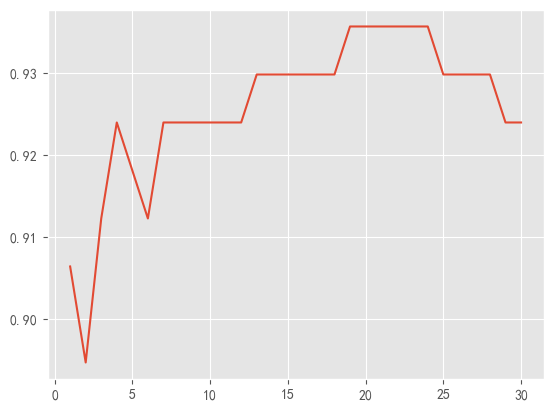

In [22]:
# 超参数学习曲线

# 准备预测结果保存序列，每更换一次k值，获取一次预测结果，该结果以及对应折线图的纵坐标
scores = []

# 给定k值的变化范围
k_range = range(1, 31)

# 构建for循环
for i in k_range:
  
  # 每一次迭代过程中都构建一次KNN分类器对象
  clf = KNeighborsClassifier(n_neighbors = i)
  
  # 训练模型
  clf = clf.fit(X_train, Y_train)
  
  # 评估模型，获得评估分数，将其添加到scores序列
  scores.append(clf.score(X_test, Y_test))

plt.plot(k_range, scores)
# scores.index(max(scores))

print('当score评分值出现极大值：{}时，对应的索引值为{}，此时k={}即为调参后所得的最优解'.format(
  max(scores),
  scores.index(max(scores)), 
  scores.index(max(scores)) + 1)
)

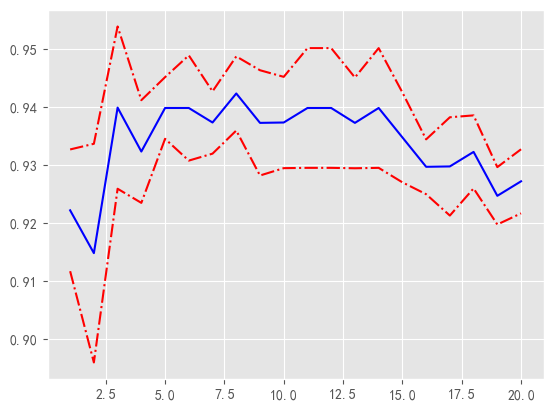

In [33]:
# 绘制带有K折交叉验证的超参数学习曲线对超参数K进行调优，求解出其局部最优解
from sklearn.model_selection import cross_val_score

# 评分结果的保存序列
scores = []

# 准备保存K折交叉验证时所得预测结果的方差数组
var = []

# 准备K值的变化范围
k_range = range(1, 21)

# for循环遍历
for i in k_range:
  
  # 构建KNN分类器模型
  clf = KNeighborsClassifier(n_neighbors = i)
  
  # 交叉验证
  cv = cross_val_score(clf, X_train, Y_train, cv = 10) # 传入一个基本模型，传入训练集数据和标签，cv交叉验证会自动完成10折交叉验证过程，这个过程会自动进行10次模型在不同训练集和测试集上的训练及预测过程
  
  # 获取每一次交叉验证所得的预测评分，求均值后加入到scores中
  scores.append(cv.mean())
  
  # 获取每一次交叉验证所得的预测评分，求评分的方差后加入到var中
  var.append(cv.var())
  
plt.plot(k_range, scores, color = 'blue') # 这是绘制的第一条曲线，表示10折交叉验证的均值评分结果

# 绘制带有正负方差效果的均值曲线
plt.plot(k_range, np.array(scores) + np.array(var) * 10, color = 'red', linestyle = '-.')
plt.plot(k_range, np.array(scores) - np.array(var) * 10, color = 'red', linestyle = '-.')
  
  
